In [34]:
import cv2
import os
import tensorflow as tf
data_path='Datasets'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels))

print(label_dict)
print(categories)
print(labels)

{'female': 0, 'male': 1}
['female', 'male']
[0, 1]


In [6]:
tf.config.list_physical_devices('GPU')

[]

In [35]:
img_size=32
data=[]
target=[]

facedata = "haarcascade_frontalface_default.xml"
cascade = cv2.CascadeClassifier(facedata)


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        faces = cascade.detectMultiScale(img)
        try:
            for f in faces:
                x, y, w, h = [v for v in f]
                sub_face = img[y:y + h, x:x + w]
                gray=cv2.cvtColor(sub_face,cv2.COLOR_BGR2GRAY)           
                resized=cv2.resize(gray,(img_size,img_size))
                data.append(resized)
                target.append(label_dict[category])
        except Exception as e:
            print('Exception:',e)

In [3]:
# pip install tensorflow

In [36]:
os.makedirs('./training/data')
os.makedirs('./training/target')

In [37]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

np.save('./training/data',data)
np.save('./training/target',new_target)



In [38]:
import numpy as np

data=np.load('./training/data.npy')
target=np.load('./training/target.npy')

In [39]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint


noOfFilters=64
sizeOfFilter1=(3,3)
sizeOfFilter2=(3,3)
sizeOfPool=(2,2)
noOfNode=64



model=Sequential()
model.add((Conv2D(32, sizeOfFilter1, input_shape=data.shape[1:],activation='relu')))
model.add((Conv2D(32, sizeOfFilter1,activation='relu')))
model.add(MaxPooling2D(pool_size=sizeOfPool))

model.add((Conv2D(64, sizeOfFilter2,activation='relu')))
model.add((Conv2D(64, sizeOfFilter2,activation='relu')))
model.add(MaxPooling2D(pool_size=sizeOfPool))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(noOfNode, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [40]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [41]:
checkpoint = ModelCheckpoint('./training/model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
91/92 [============================>.] - ETA: 0s - loss: 0.6924 - accuracy: 0.5130

INFO:tensorflow:Assets written to: ./training\model-001.model\assets


INFO:tensorflow:Assets written to: ./training\model-001.model\assets


92/92 [==============================] - 13s 109ms/step - loss: 0.6924 - accuracy: 0.5128 - val_loss: 0.6905 - val_accuracy: 0.5335
Epoch 2/20
91/92 [============================>.] - ETA: 0s - loss: 0.6573 - accuracy: 0.5865

INFO:tensorflow:Assets written to: ./training\model-002.model\assets


INFO:tensorflow:Assets written to: ./training\model-002.model\assets


92/92 [==============================] - 10s 105ms/step - loss: 0.6572 - accuracy: 0.5871 - val_loss: 0.6137 - val_accuracy: 0.7127
Epoch 3/20
91/92 [============================>.] - ETA: 0s - loss: 0.4816 - accuracy: 0.7867

INFO:tensorflow:Assets written to: ./training\model-003.model\assets


INFO:tensorflow:Assets written to: ./training\model-003.model\assets


92/92 [==============================] - 10s 108ms/step - loss: 0.4803 - accuracy: 0.7875 - val_loss: 0.2945 - val_accuracy: 0.8947
Epoch 4/20
91/92 [============================>.] - ETA: 0s - loss: 0.3155 - accuracy: 0.8740

INFO:tensorflow:Assets written to: ./training\model-004.model\assets


INFO:tensorflow:Assets written to: ./training\model-004.model\assets


92/92 [==============================] - 9s 103ms/step - loss: 0.3150 - accuracy: 0.8738 - val_loss: 0.1860 - val_accuracy: 0.9398
Epoch 5/20
92/92 [==============================] - 7s 72ms/step - loss: 0.2615 - accuracy: 0.8929 - val_loss: 0.1896 - val_accuracy: 0.9289
Epoch 6/20
91/92 [============================>.] - ETA: 0s - loss: 0.2204 - accuracy: 0.9210

INFO:tensorflow:Assets written to: ./training\model-006.model\assets


INFO:tensorflow:Assets written to: ./training\model-006.model\assets


92/92 [==============================] - 10s 113ms/step - loss: 0.2198 - accuracy: 0.9213 - val_loss: 0.1724 - val_accuracy: 0.9371
Epoch 7/20
91/92 [============================>.] - ETA: 0s - loss: 0.1979 - accuracy: 0.9279

INFO:tensorflow:Assets written to: ./training\model-007.model\assets


INFO:tensorflow:Assets written to: ./training\model-007.model\assets


92/92 [==============================] - 10s 107ms/step - loss: 0.1972 - accuracy: 0.9282 - val_loss: 0.1555 - val_accuracy: 0.9453
Epoch 8/20
91/92 [============================>.] - ETA: 0s - loss: 0.1782 - accuracy: 0.9361

INFO:tensorflow:Assets written to: ./training\model-008.model\assets


INFO:tensorflow:Assets written to: ./training\model-008.model\assets


92/92 [==============================] - 10s 113ms/step - loss: 0.1782 - accuracy: 0.9360 - val_loss: 0.1440 - val_accuracy: 0.9480
Epoch 9/20
91/92 [============================>.] - ETA: 0s - loss: 0.1577 - accuracy: 0.9461

INFO:tensorflow:Assets written to: ./training\model-009.model\assets


INFO:tensorflow:Assets written to: ./training\model-009.model\assets


92/92 [==============================] - 10s 107ms/step - loss: 0.1573 - accuracy: 0.9463 - val_loss: 0.1294 - val_accuracy: 0.9549
Epoch 10/20
92/92 [==============================] - 7s 76ms/step - loss: 0.1491 - accuracy: 0.9494 - val_loss: 0.1453 - val_accuracy: 0.9439
Epoch 11/20
92/92 [==============================] - 7s 76ms/step - loss: 0.1476 - accuracy: 0.9432 - val_loss: 0.1463 - val_accuracy: 0.9439
Epoch 12/20
92/92 [==============================] - 7s 75ms/step - loss: 0.1316 - accuracy: 0.9504 - val_loss: 0.1340 - val_accuracy: 0.9453
Epoch 13/20
92/92 [==============================] - 7s 74ms/step - loss: 0.1220 - accuracy: 0.9569 - val_loss: 0.1323 - val_accuracy: 0.9521
Epoch 14/20
92/92 [==============================] - 7s 79ms/step - loss: 0.1100 - accuracy: 0.9572 - val_loss: 0.1459 - val_accuracy: 0.9494
Epoch 15/20
92/92 [==============================] - 7s 78ms/step - loss: 0.1277 - accuracy: 0.9542 - val_loss: 0.1610 - val_accuracy: 0.9384
Epoch 16/20
92/9

INFO:tensorflow:Assets written to: ./training\model-020.model\assets


INFO:tensorflow:Assets written to: ./training\model-020.model\assets


92/92 [==============================] - 10s 104ms/step - loss: 0.0908 - accuracy: 0.9658 - val_loss: 0.1256 - val_accuracy: 0.9549


In [42]:
history.history

{'loss': [0.6924067139625549,
  0.6571521162986755,
  0.480331689119339,
  0.31499576568603516,
  0.2615102231502533,
  0.21983571350574493,
  0.1972450613975525,
  0.1782083511352539,
  0.1572566032409668,
  0.1490679532289505,
  0.14759676158428192,
  0.13157431781291962,
  0.12196258455514908,
  0.11003157496452332,
  0.12768208980560303,
  0.10993864387273788,
  0.09160006046295166,
  0.08474162220954895,
  0.084452785551548,
  0.09079885482788086],
 'accuracy': [0.5128293037414551,
  0.5870680809020996,
  0.7875470519065857,
  0.8737598061561584,
  0.8929182291030884,
  0.9213137030601501,
  0.9281560182571411,
  0.9360246062278748,
  0.9462880492210388,
  0.949367105960846,
  0.9432090520858765,
  0.9503934383392334,
  0.9568936228752136,
  0.9572356939315796,
  0.9541566967964172,
  0.9565514922142029,
  0.9685254693031311,
  0.9698939323425293,
  0.9668149352073669,
  0.9657886028289795],
 'val_loss': [0.6905312538146973,
  0.6137036085128784,
  0.294475793838501,
  0.185962855

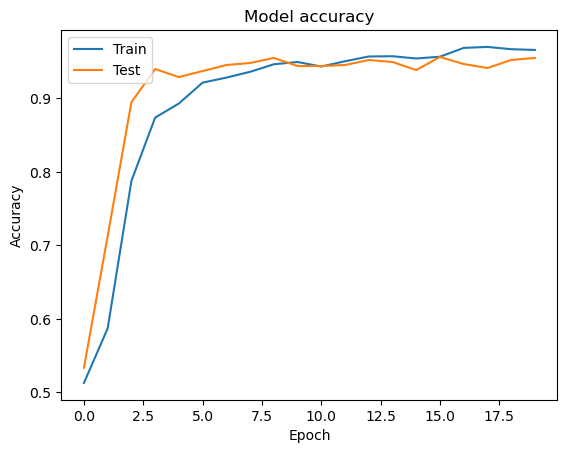

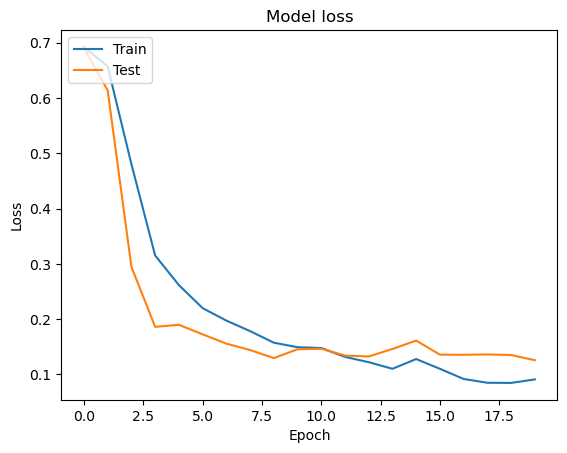

In [43]:
import matplotlib.pyplot as plt

# 绘制训练 & 验证的准确率值
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 绘制训练 & 验证的损失值
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [44]:
from keras.models import load_model
import cv2
import numpy as np

In [45]:
model = load_model('./training/model-020.model')

face_clsfr=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

cap=cv2.VideoCapture(0)

labels_dict={0:'Male',1:'Female'}
color_dict={0:(0,0,255),1:(0,255,0)}

In [46]:
while(True):

    ret,img=cap.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,3)  

    for (x,y,w,h) in faces:
    
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(32,32))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,32,32,1))
        result=model.predict(reshaped)

        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        
    cv2.imshow('Result',img)
    k=cv2.waitKey(1)
    
    if k==ord("q"):
        break
        
cv2.destroyAllWindows()
cap.release()

1/1 [==============================] - 0s 45ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 35ms/step
